# Experiments on breath identification

## Import libraries

In [1]:
%matplotlib widget
import ipywidgets as widgets

import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import math
from TMSiSDK.file_readers import Poly5Reader

sys.path.insert(0, '../resurfemg')
import helper_functions as hf
from config import Config

C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:321: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(scipy.__version__) >= '1.1':
C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):
C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):


# Set a collection place for experiments

In [2]:
# do not re-run this cell
big_data_list= []

Below change the path to the root directory where you are keeping your EMGs and ventilator "Draeger" files

In [3]:
config = Config()
root_emg_directory = config.get_directory('root_emg_directory')

In [4]:
emg_pattern = os.path.join(root_emg_directory, '**/*.Poly5')
emg_and_draeger_files = glob.glob(emg_pattern, recursive=True)

emg_files = []
draeger_files = []

for file in emg_and_draeger_files:
    if 'Draeger' in file:
        draeger_files.append(file)
    else:
        emg_files.append(file)

# # print an example from the list
# print(emg_files[1],draeger_files[1])

Now you can pick a file from the list, which have been numbered 0-35.

In [5]:
list_of_numbers_strung = []
for i in range(len(emg_files)):
    list_of_numbers_strung.append(str(i))

btn = widgets.Dropdown(
    options=list_of_numbers_strung,
    value='0',
    description='Picked File:',
    disabled=False,
)
display(btn)

Dropdown(description='Picked File:', options=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '1…

In [6]:
number_chosen = int(btn.value)
file_chosen = emg_files[number_chosen]
print(file_chosen)

../not_pushed\topspin_data_anonymized\M002\004\EMG_recording.Poly5


In [7]:
data_emg = Poly5Reader(file_chosen)
data_samples = data_emg.samples
emg_sample_rate = data_emg.sample_rate
converted_to_seconds = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_sample_rate)

Reading file  ../not_pushed\topspin_data_anonymized\M002\004\EMG_recording.Poly5
	 Number of samples:  766560 
	 Number of channels:  3 
	 Sample rate: 2048 Hz

Progress:  0.0 %

Progress:  0.4 %

Progress:  0.7 %

Progress:  1.1 %

Progress:  1.4 %

Progress:  1.8 %

Progress:  2.1 %

Progress:  2.5 %

Progress:  2.8 %

Progress:  3.2 %

Progress:  3.6 %

Progress:  3.9 %

Progress:  4.3 %

Progress:  4.6 %

Progress:  5.0 %

Progress:  5.3 %

Progress:  5.7 %

Progress:  6.0 %

Progress:  6.4 %

Progress:  6.8 %

Progress:  7.1 %

Progress:  7.5 %

Progress:  7.8 %

Progress:  8.2 %

Progress:  8.5 %

Progress:  8.9 %

Progress:  9.3 %

Progress:  9.6 %

Progress:  10.0 %

Progress:  10.3 %

Progress:  10.7 %

Progress:  11.0 %

Progress:  11.4 %

Progress:  11.7 %

Progress:  12.1 %

Progress:  12.5 %

Progress:  12.8 %

Progress:  13.2 %

Progress:  13.5 %

Progress:  13.9 %

Progress:  14.2 %

Progress:  14.6 %

Progress:  14.9 %

Progress:  15.3 %

Progress:  15.7 %

Progress:  1

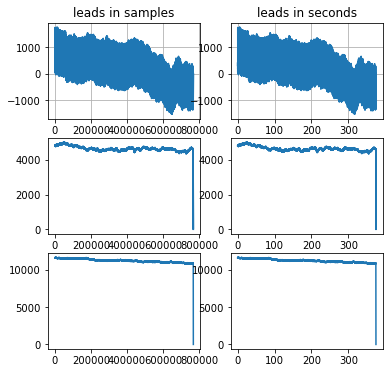

In [8]:
%matplotlib inline
# set up plot
x = data_samples
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(6, 6))
axis[0, 0].grid(True)
axis[0, 0].plot(x[0])
axis[0, 0].set(title='leads in samples')
axis[1, 0].plot(x[1])
axis[2, 0].plot(x[2])
axis[0, 1].set(title='leads in seconds')
axis[0, 1].grid(True)
axis[0, 1].plot(converted_to_seconds, x[0])
axis[1, 1].plot(converted_to_seconds, x[1])
axis[2, 1].plot(converted_to_seconds, x[2])

That is the whole unfiltered EMG, but  probably want to examine a part. You can select the part by samples or time- just make sure to pick numbers that make sense. 

In [9]:
y_axis = widgets.Dropdown(
    options=["Samples", "Seconds"],
    value='Samples',
    description="Select View Option",
    disabled=False,
)
display(y_axis)

Dropdown(description='Select View Option', options=('Samples', 'Seconds'), value='Samples')

In [10]:
time_view = y_axis.value
time_view

'Samples'

In [11]:
# type in start number and press return for it to update
start = input()

0


In [20]:
# type in end number and press return for it to update
end = input()

40000


In [21]:
start_s = float(start)* emg_sample_rate
end_s = float(end)*emg_sample_rate

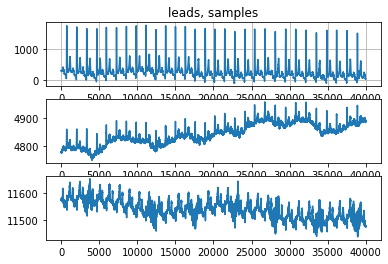

In [22]:
if time_view == 'Samples':
    # nox examine at a certain scale- from point a to b as samples
    x = data_samples
    fig, (ax_1, ax_2, ax_3) = plt.subplots(nrows=3, figsize=(6, 4))
    ax_1.grid(True)
    ax_1.plot(x[0][int(start):int(end)])
    ax_1.set(title='leads, samples')
    ax_2.plot(x[1][int(start):int(end)])
    ax_3.plot(x[2][int(start):int(end)])

if time_view == 'Seconds':
    # nox examine at a certain scale- from point a to b as samples
    x_for_secs = data_samples

    #converter_for_sample_number =90

    y = converted_to_seconds
    fig, (ax_1, ax_2, ax_3) = plt.subplots(nrows=3, figsize=(6, 4))
    ax_1.grid(True)
    ax_1.plot(y[int(start_s):int(end_s)], x[0][int(start_s):int(end_s)])
    ax_1.set(title='leads, seconds')
    ax_2.plot(y[int(start_s):int(end_s)], x[1][int(start_s):int(end_s)])
    ax_3.plot(y[int(start_s):int(end_s)], x[2][int(start_s):int(end_s)])

Happy with your selection? If not redo, then we can see how the filter works on it.

We already made selections for this experiment, let's start with those.We will put in the pictures to help us remember what is what:

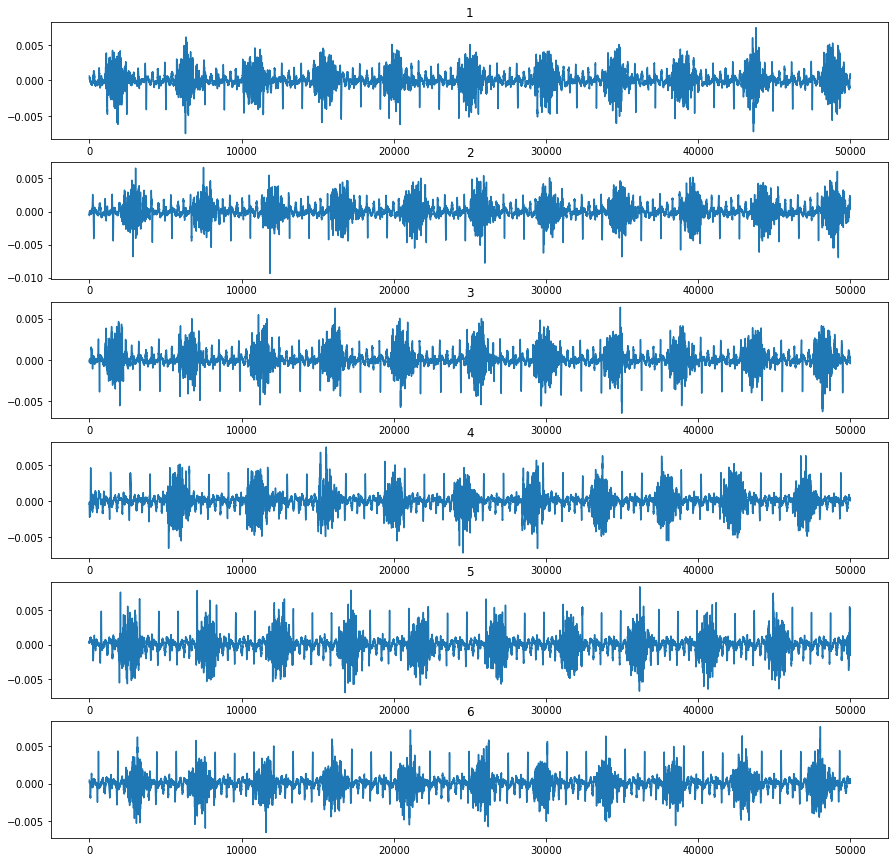

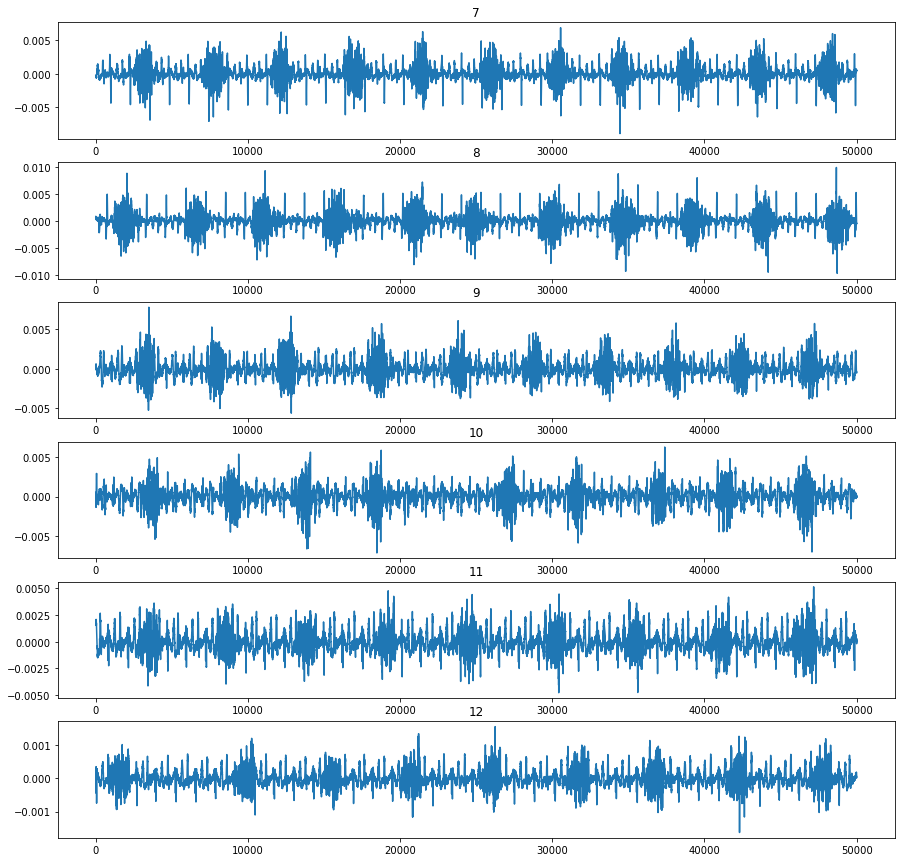

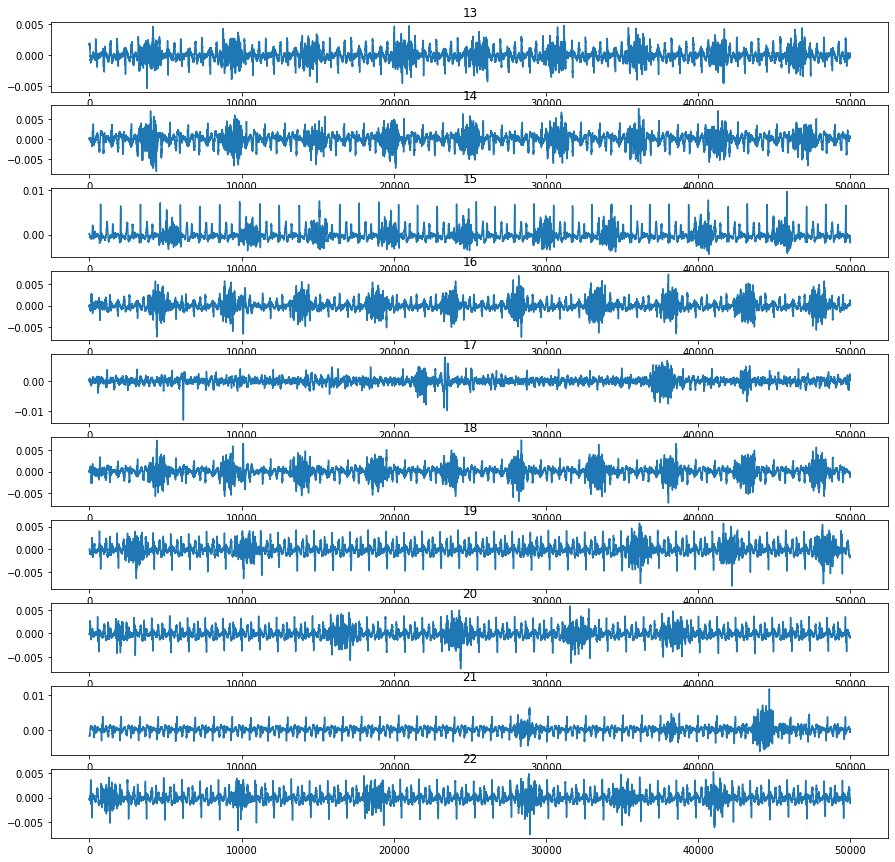

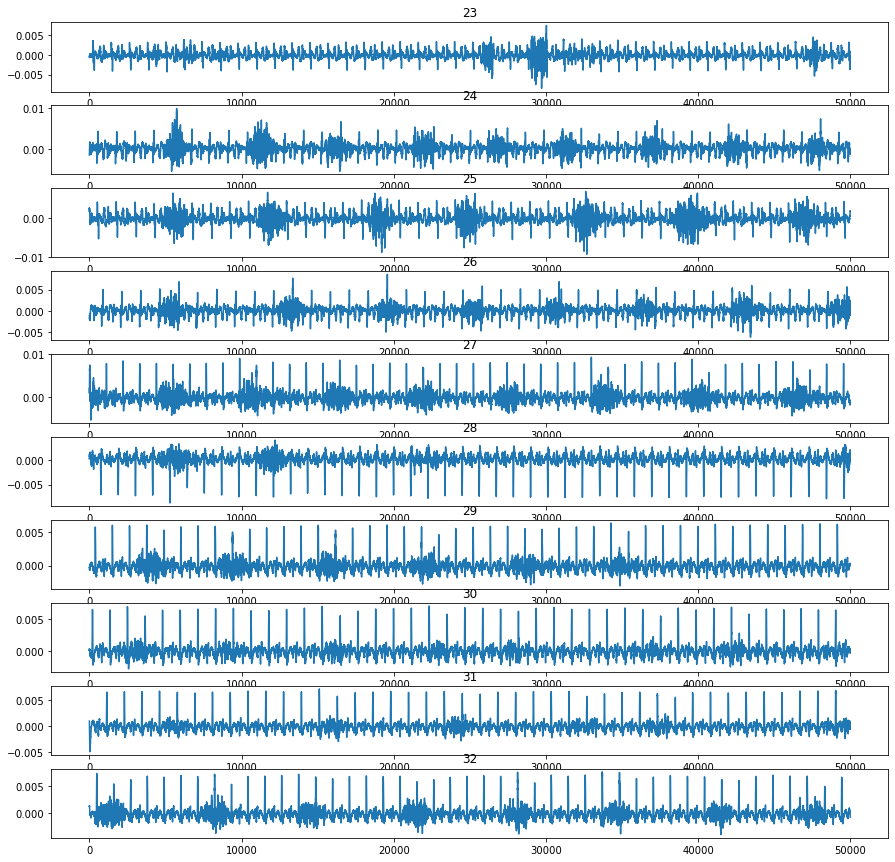

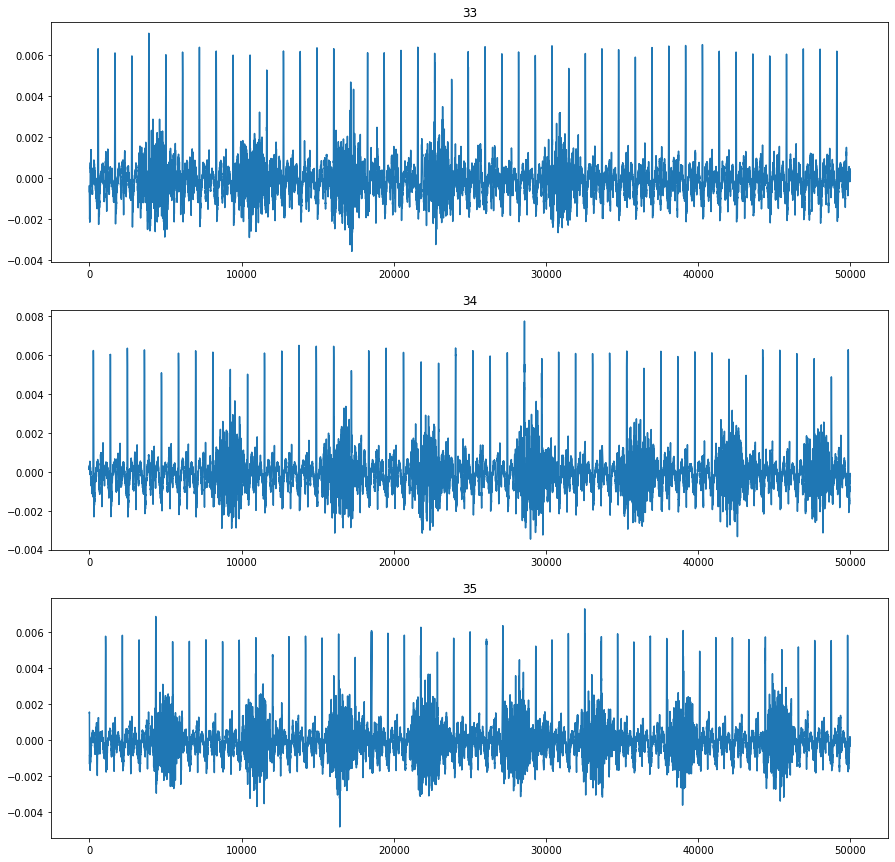

So above is oor truth, however you want to interpret it. For our experiments we assume the following counts (based on the following cuts (Eline or Rob please fill from the original notebook (breathing_counting_unfilled.ipynb)in if this is importmant to you)):

    1->11, cut =
    2->	11, cut =
    3->	11, cut =
    4->	10, cut =
    5->	10, cut =
    6->	11, cut =
    7->	11, cut =
    8->	11, cut =
    9->	10, cut =
    10-> 9, cut =
    11-> 9, cut =
    12-> 9, cut =
    13-> 9, cut =
    14-> 9, cut =
    15-> 9, cut =
    16-> 10, cut =
    17-> 3, cut =
    18-> 10 cut =
    19-> 5, cut =
    20-> 4/5?,cut =
    21-> 3,  cut =
    22-> 6, cut =
    23-> 3, cut =
    24-> 9, cut =
    25-> 7, cut =
    26-> 8, cut =
    27-> 8, cut =
    28-> 2, cut =
    29-> 6, cut =
    30-> 7, cut =
    31-> 5, cut =
    32-> 8, cut =
    33-> 5, cut =
    34-> 7, cut =
    35-> 8, cut =

In [23]:
def working_pipeline_exp2_2(our_chosen_file):
    cut_file_data = hf.bad_end_cutter_for_samples(
        our_chosen_file, percent_to_cut=3, tolerance_percent=5)
    bd_filtered_file_data = hf.emg_bandpass_butter_sample(
        cut_file_data, 5, 450, 2048, output='sos')
    # step 3 end-cutting again to get rid of filtering artifacts
    re_cut_file_data = hf.bad_end_cutter_for_samples(
        bd_filtered_file_data, percent_to_cut=3, tolerance_percent=5)
    # skip step4 and do step 5 ICA
    components = hf.compute_ICA_two_comp(re_cut_file_data)
    #     the secret hidden step!
    emg = hf.pick_more_peaks_array(components)
    # now process it in final steps
    abs_values = abs(emg)
    final_envelope_d = hf.emg_highpass_butter(abs_values, 150, 2048)
    #final_envelope_a = helper_functions.naive_rolling_rms(final_envelope_d, 300)
    # plt.plot(final_envelope_a[0:5000])

    return final_envelope_d

C:\Users\makeda\anaconda3\envs\remgenv-4\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


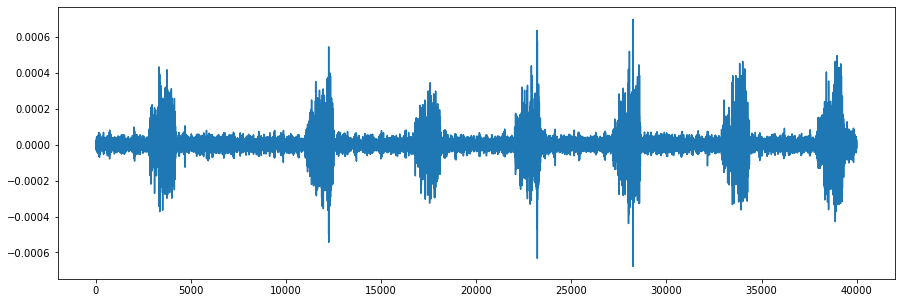

In [24]:
x = working_pipeline_exp2_2(data_samples)
if time_view == 'Samples':
    plt.figure(figsize=(15, 5))
    plt.plot(x[int(start):int(end)])
else:
    plt.figure(figsize=(15, 5))

    plt.plot(y[int(start_s):int(end_s)], x[int(start_s):int(end_s)])

Here you should enter what you think the count is

In [25]:
my_count = input()

5


Now for our sample let's make a cut off and count the breaths automatically

In [26]:
if time_view == 'Samples':
    x = x[int(start):int(end)]  # we cut it down to our selection
else:
    x = x[int(start_s):int(end_s)]
abs_x = abs(x)
rms_abs = hf.vect_naive_rolling_rms(abs_x, 400)

Now let's widget try a cut from the max. If you chose seconds it will show the measurements in samples for now. We will update this code later.

In [27]:
int_slider1 = widgets.IntSlider(
    min=1, max=100, step=1,
    description='percentage of maximum'
)
widgets.VBox(
    [

        int_slider1,


    ]
)


@widgets.interact(low=int_slider1)
def update(low=int_slider1):
    with plt.style.context("ggplot"):
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.grid(True)
        [l.remove() for l in ax.lines]
        low_per = low/100
        ax.plot(hf.zero_one_for_jumps_base(
            rms_abs, rms_abs.max()*low_per), color='C0')
        ax.plot(x*1000, alpha=0.2)

interactive(children=(IntSlider(value=1, description='percentage of maximum', min=1), Output()), _dom_classes=…

In [78]:
max_per_ = int_slider1.value
max_per_ = max_per_ / 100
decision_line = hf.zero_one_for_jumps_base(rms_abs, rms_abs.max()*max_per_)
max_per_peak_count = hf.count_decision_array(decision_line)
max_per_peak_count

1.0

Looks like an improvement, but how much information did we lose?

# Storing off this experiment

I would argue we lost more noise than important 'information', but now we have a framework to start comparing information loss

Now let's save the information we just generated.

In [79]:
data_now = [file_chosen, number_chosen, start, end,
            max_per_, max_per_peak_count, my_count, time_view]

In [80]:
data_now

['../not_pushed\\topspin_data_anonymized\\M001\\007\\EMG_recording.Poly5',
 6,
 '1',
 '3',
 0.36,
 1.0,
 '1',
 'Seconds']

In [81]:
# run every time you want to append a new sample
big_data_list.append(data_now)
big_data_list

[['../not_pushed\\topspin_data_anonymized\\M002\\004\\EMG_recording.Poly5',
  12,
  '100',
  '10000',
  0.22,
  1.0,
  '1'],
 ['../not_pushed\\topspin_data_anonymized\\M002\\004\\EMG_recording.Poly5',
  12,
  '100',
  '10000',
  0.22,
  1.0,
  '1',
  'Samples'],
 ['../not_pushed\\topspin_data_anonymized\\M001\\007\\EMG_recording.Poly5',
  6,
  '1',
  '3',
  0.36,
  1.0,
  '1',
  'Seconds']]

In [82]:
columns_now = ['file_chosen',
               'number_file',
               'start_cut',
               'end_cut',
               'cut_off_percent',
               'automated_breath_count',
               'my_hand_count',
               'units',

               ]

df = pd.DataFrame(big_data_list, columns=columns_now)

In [83]:
df

,file_chosen,number_file,start_cut,end_cut,cut_off_percent,automated_breath_count,my_hand_count,units
0,../not_pushed\topspin_data_anonymized\M002\004...,12,100,10000,0.22,1.0,1,None
1,../not_pushed\topspin_data_anonymized\M002\004...,12,100,10000,0.22,1.0,1,Samples
2,../not_pushed\topspin_data_anonymized\M001\007...,6,1,3,0.36,1.0,1,Seconds


In [ ]:
df.to_csv('my_saved_experiments_WB.csv')

You probably want to change the name to a timestamp, and save every hour. 